In [2]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Imputation/Imputation.jl");

  Activating project at `~/Desktop/QuantumInspiredMLFinal/QuantumInspiredML`


In [3]:
using Plots
using JLD2
using Random, Distributions
using StatsBase
using Plots.PlotMeasures
using ProgressMeter

In [4]:
svpath_ns = "/Users/joshua/Desktop/QuantumInspiredML/FinalBenchmarks/ItalyPower/demo_imputation_plots/legendre_ns_d20_chi50.jld2";
dloc =  "../../../Data/italypower/datasets/ItalyPowerDemandOrig.jld2";

In [5]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)
fstyle = font("sans-serif", 23);

In [6]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);

┌ Warning: saved type MPSOptions is missing field data_bounds in workspace type; reconstructing
└ @ JLD2 /Users/joshua/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:195


MethodError: MethodError: no method matching safe_options(::JLD2.ReconstructedMutable{:MPSOptions, (:verbosity, :nsweeps, :chi_max, :eta, :d, :encoding, :projected_basis, :aux_basis_dim, :cutoff, :update_iters, :dtype, :loss_grad, :bbopt, :track_cost, :rescale, :train_classes_separately, :encode_classes_separately, :return_encoding_meta_info, :minmax, :exit_early, :sigmoid_transform, :init_rng, :chi_init, :log_level), Tuple{Int64, Int64, Int64, Float64, Int64, Symbol, Bool, Int64, Float64, Int64, DataType, Symbol, Symbol, Bool, Tuple{Bool, Bool}, Bool, Bool, Bool, Bool, Bool, Bool, Int64, Int64, Int64}}, ::Nothing, ::Nothing)
The function `safe_options` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  safe_options(!Matched::Options, ::Any...)
   @ Main ~/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/LogLoss/structs/options.jl:244
  safe_options(!Matched::MPSOptions, ::Any, ::Any)
   @ Main ~/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/LogLoss/structs/options.jl:224


╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0887229 │
│ NN_MAE │  0.341736 │
╰────────┴───────────╯


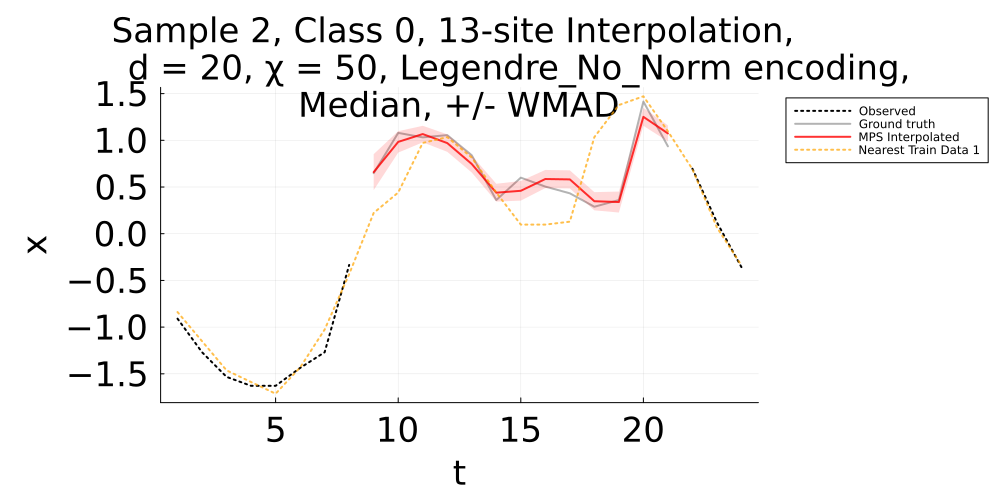

In [87]:
interp_sites = collect(9:21)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 2, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")
#savefig("13pt1_impute_ipd.svg")

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │   0.1333 │
│ NN_MAE │ 0.136955 │
╰────────┴──────────╯


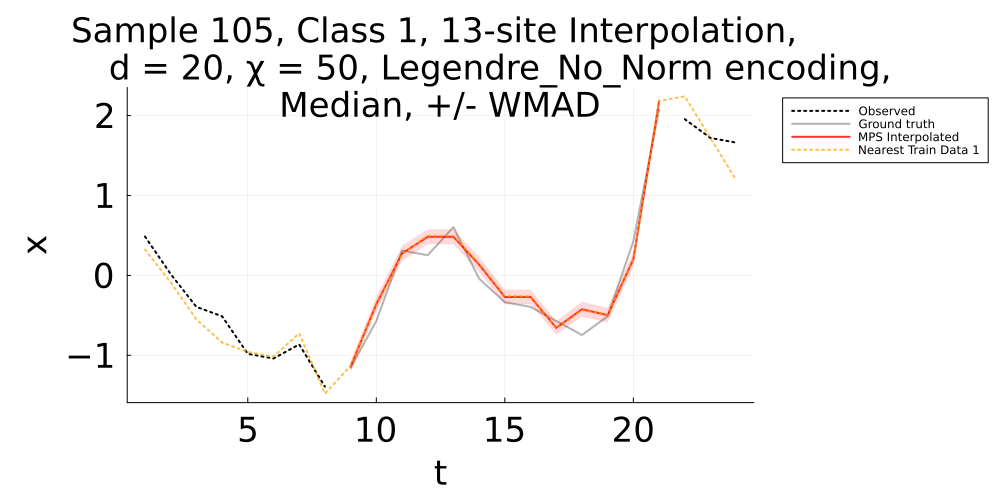

In [88]:
interp_sites = collect(9:21)
class = 1
stats, p1_ns = any_interpolate_median(fc, class, 105, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")
#savefig("13pt2_impute_ipd.svg")

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.101285 │
│ NN_MAE │ 0.136432 │
╰────────┴──────────╯


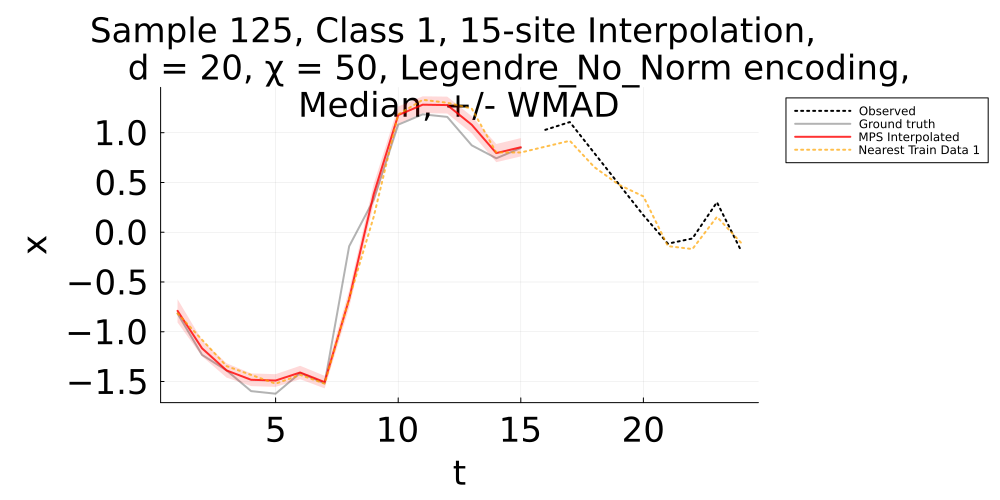

In [48]:
interp_sites = collect(1:15)
class = 1
stats, p1_ns = any_interpolate_median(fc, class, 125, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")
#savefig("15pt1_impute_ipd.svg")

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.187887 │
│ NN_MAE │ 0.353706 │
╰────────┴──────────╯


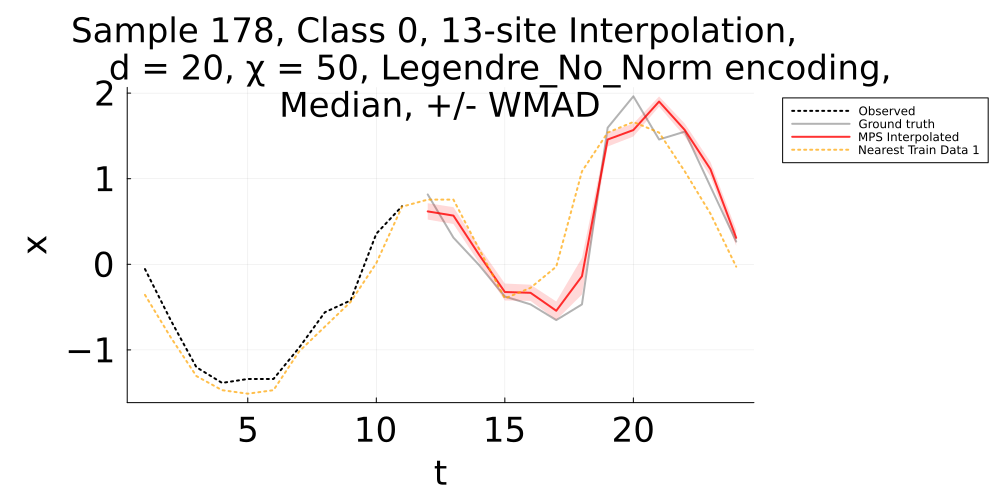

In [55]:
interp_sites = collect(1:15)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 165, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")
#savefig("15pt2_impute_ipd.svg")

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0614921 │
│ NN_MAE │  0.186477 │
╰────────┴───────────╯


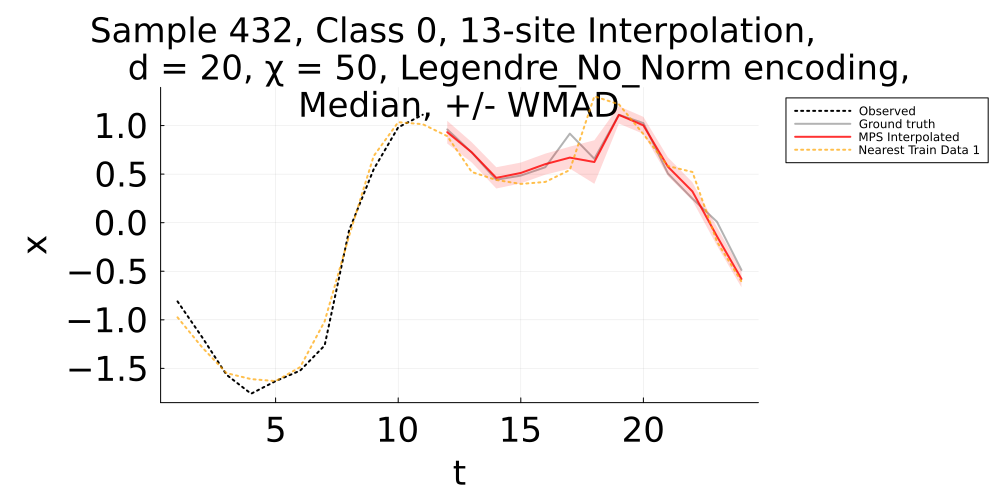

In [59]:
interp_sites = collect(12:24)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 432, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")
#savefig("13pt1_impute_ipd.svg")

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0773839 │
│ NN_MAE │  0.377202 │
╰────────┴───────────╯


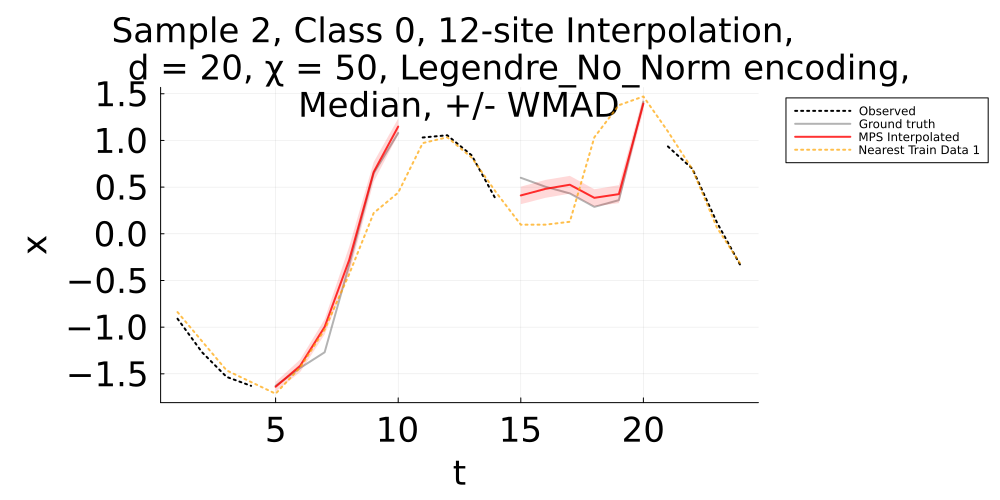

In [91]:
interp_sites = vcat(collect(5:10), collect(15:20))
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 2, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")
#savefig("12pt5_impute_ipd.svg")